In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

from pathlib import Path

import matplotlib.pyplot as plt
import motorlab as ml
import numpy as np
import seaborn as sns
import yaml

In [3]:
os.chdir(Path().resolve().parent)

In [4]:
runs_map = {
    "20250703191959": {
        "folder": "config/pose_and_spike_count_to_position/",
        "label": "Poses + M1",
    },
    "20250704073742": {
        "folder": "config/pose_and_spike_count_to_position/",
        "label": "Poses + PMd",
    },
    "20250702104726": {
        "folder": "config/pose_to_position/",
        "label": "Poses",
    },
    "20250701122409": {
        "folder": "config/spike_count_to_position/",
        "label": "M1",
    },
    "20250701140412": {
        "folder": "config/spike_count_to_position/",
        "label": "PMd",
    },
}

In [5]:
results = {
    "mse": [],
    "input": [],
    "session": [],
    "acc": [],
}

for run in runs_map:
    CONFIG_PATH = Path(f"{runs_map[run]['folder']}/{run}.yaml")

    with open(CONFIG_PATH, "r") as f:
        config = yaml.safe_load(f)

    config["dataset"] = {"seq_length": 20, "stride": 20}

    eval_metrics, eval_gts, eval_preds = ml.model.evaluate(config)

    for session in eval_preds:
        eval_gts[session] = eval_gts[session].reshape(-1, 2)
        eval_preds[session] = eval_preds[session].reshape(-1, 2)
        results["session"].append(session)
        results["input"].append(runs_map[run]["label"])
        results["mse"].append(
            np.mean((eval_gts[session] - eval_preds[session]) ** 2)
        )
        results["acc"].append(
            ml.metrics.balanced_accuracy(
                ml.room.get_tile(
                    eval_gts[session][:, 0], eval_gts[session][:, 1]
                ),
                ml.room.get_tile(
                    eval_preds[session][:, 0], eval_preds[session][:, 1]
                ),
            )
        )

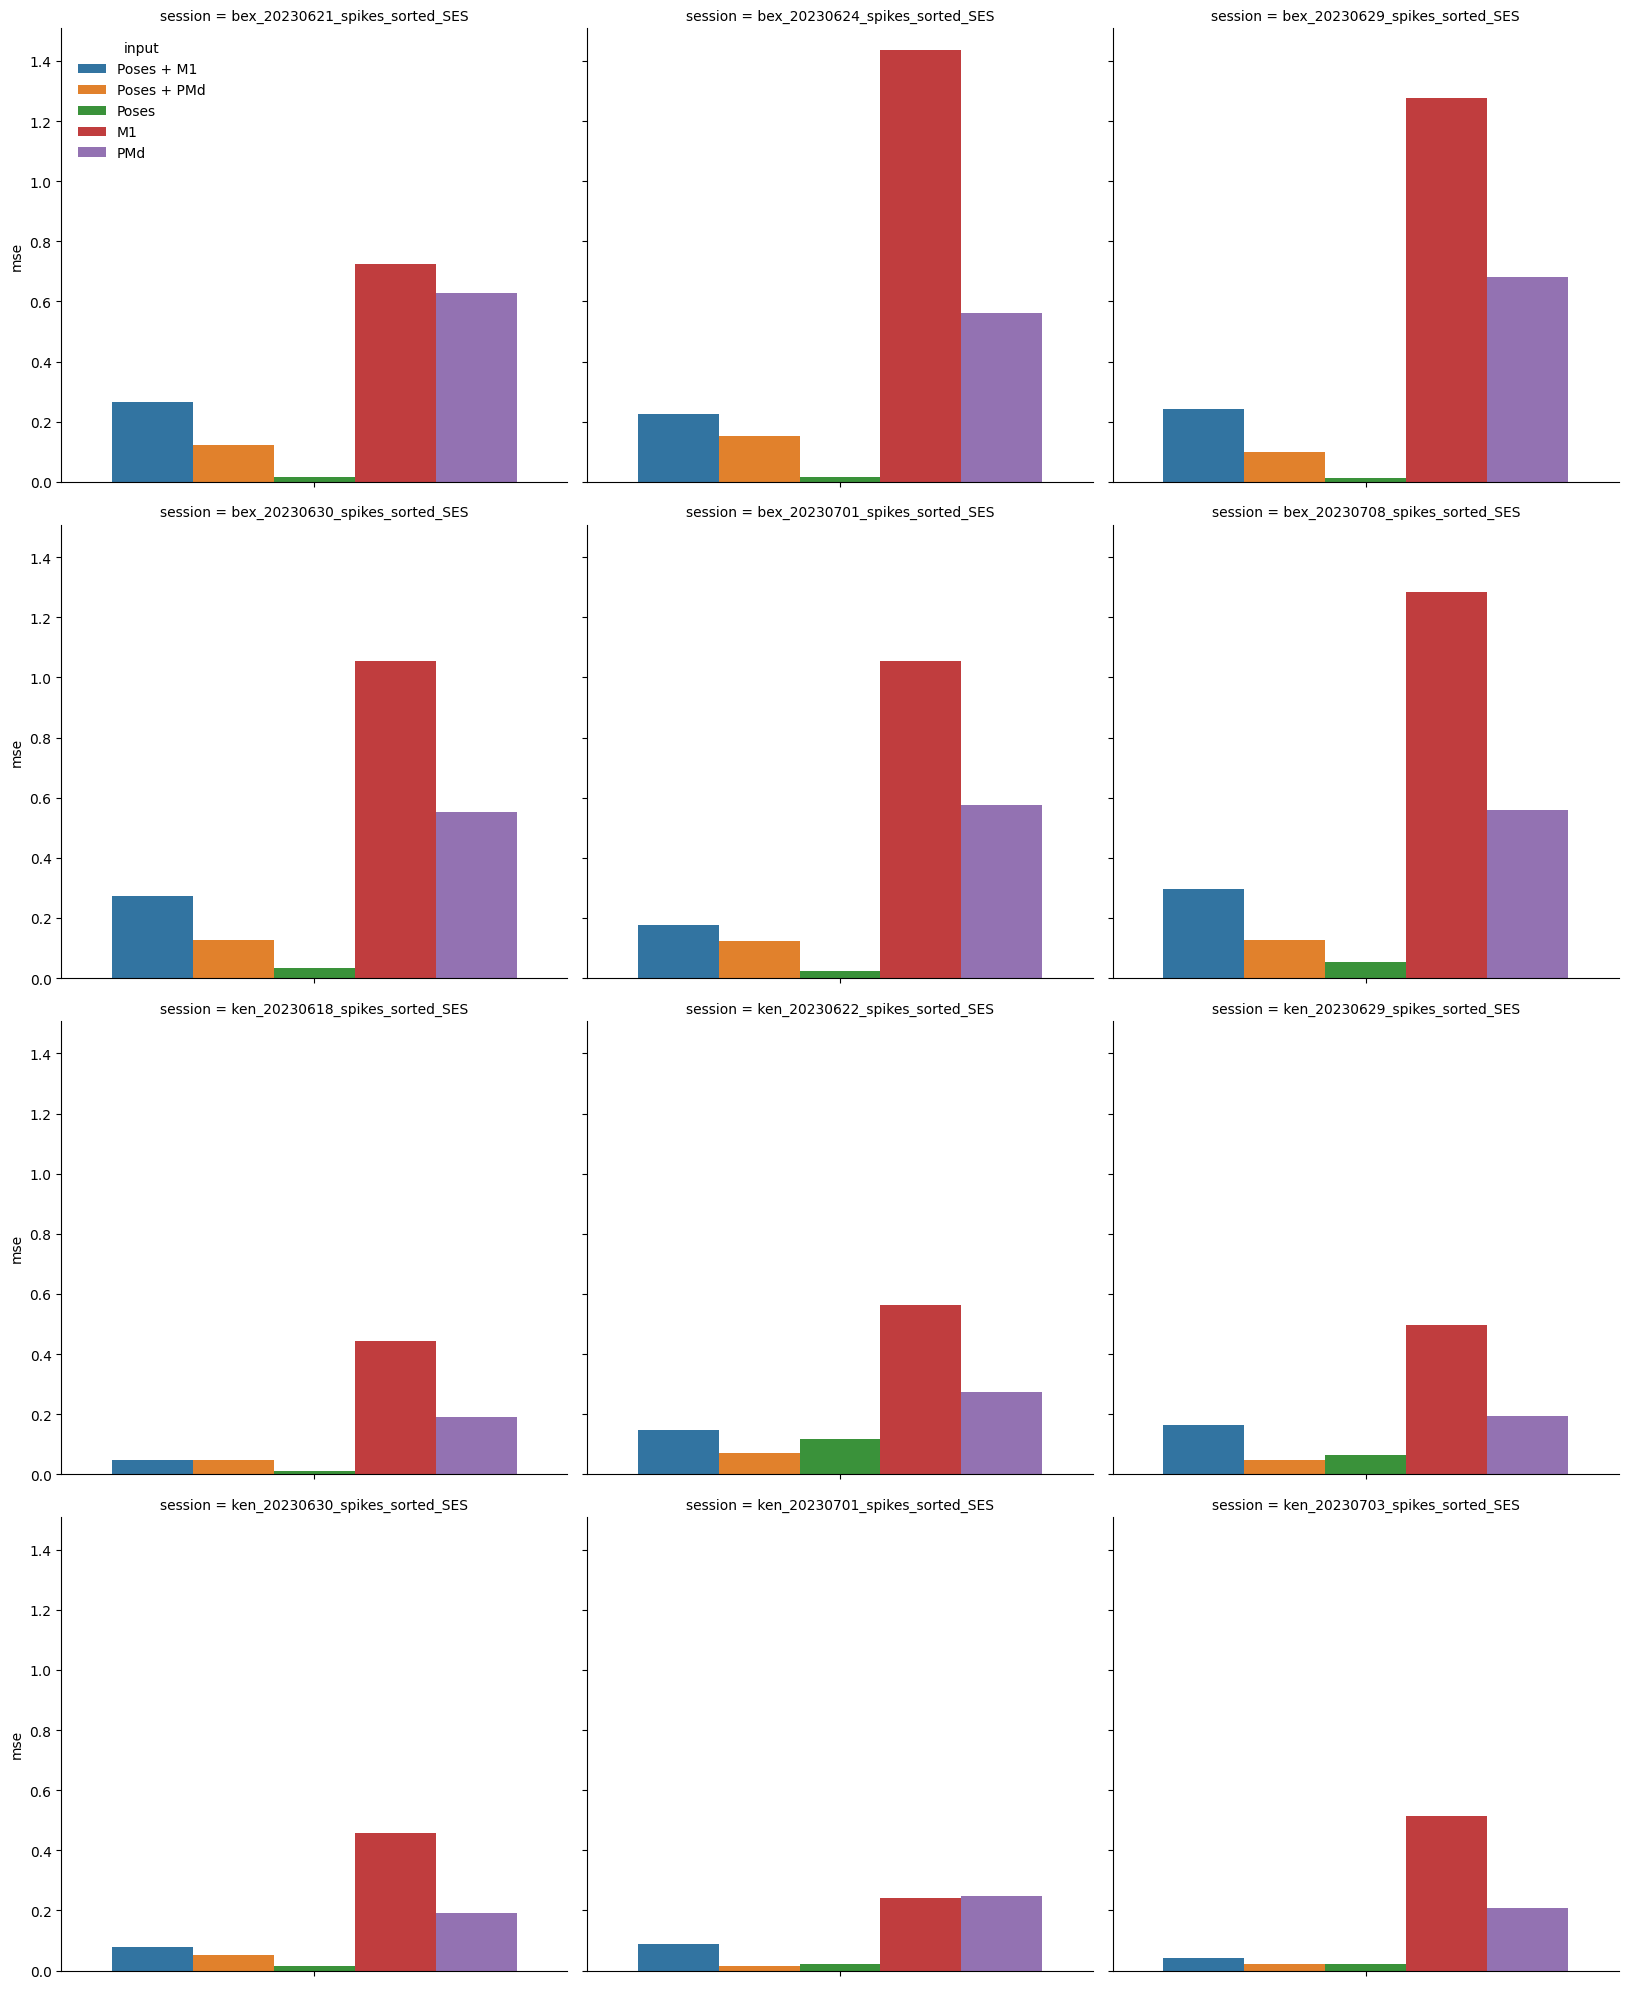

In [9]:
g = sns.catplot(
    data=results,
    hue="input",
    y="mse",
    col="session",
    kind="bar",
    col_wrap=3,
)

g._legend.set_bbox_to_anchor((0.04, 0.98))
g._legend.set_loc("upper left")
plt.tight_layout()

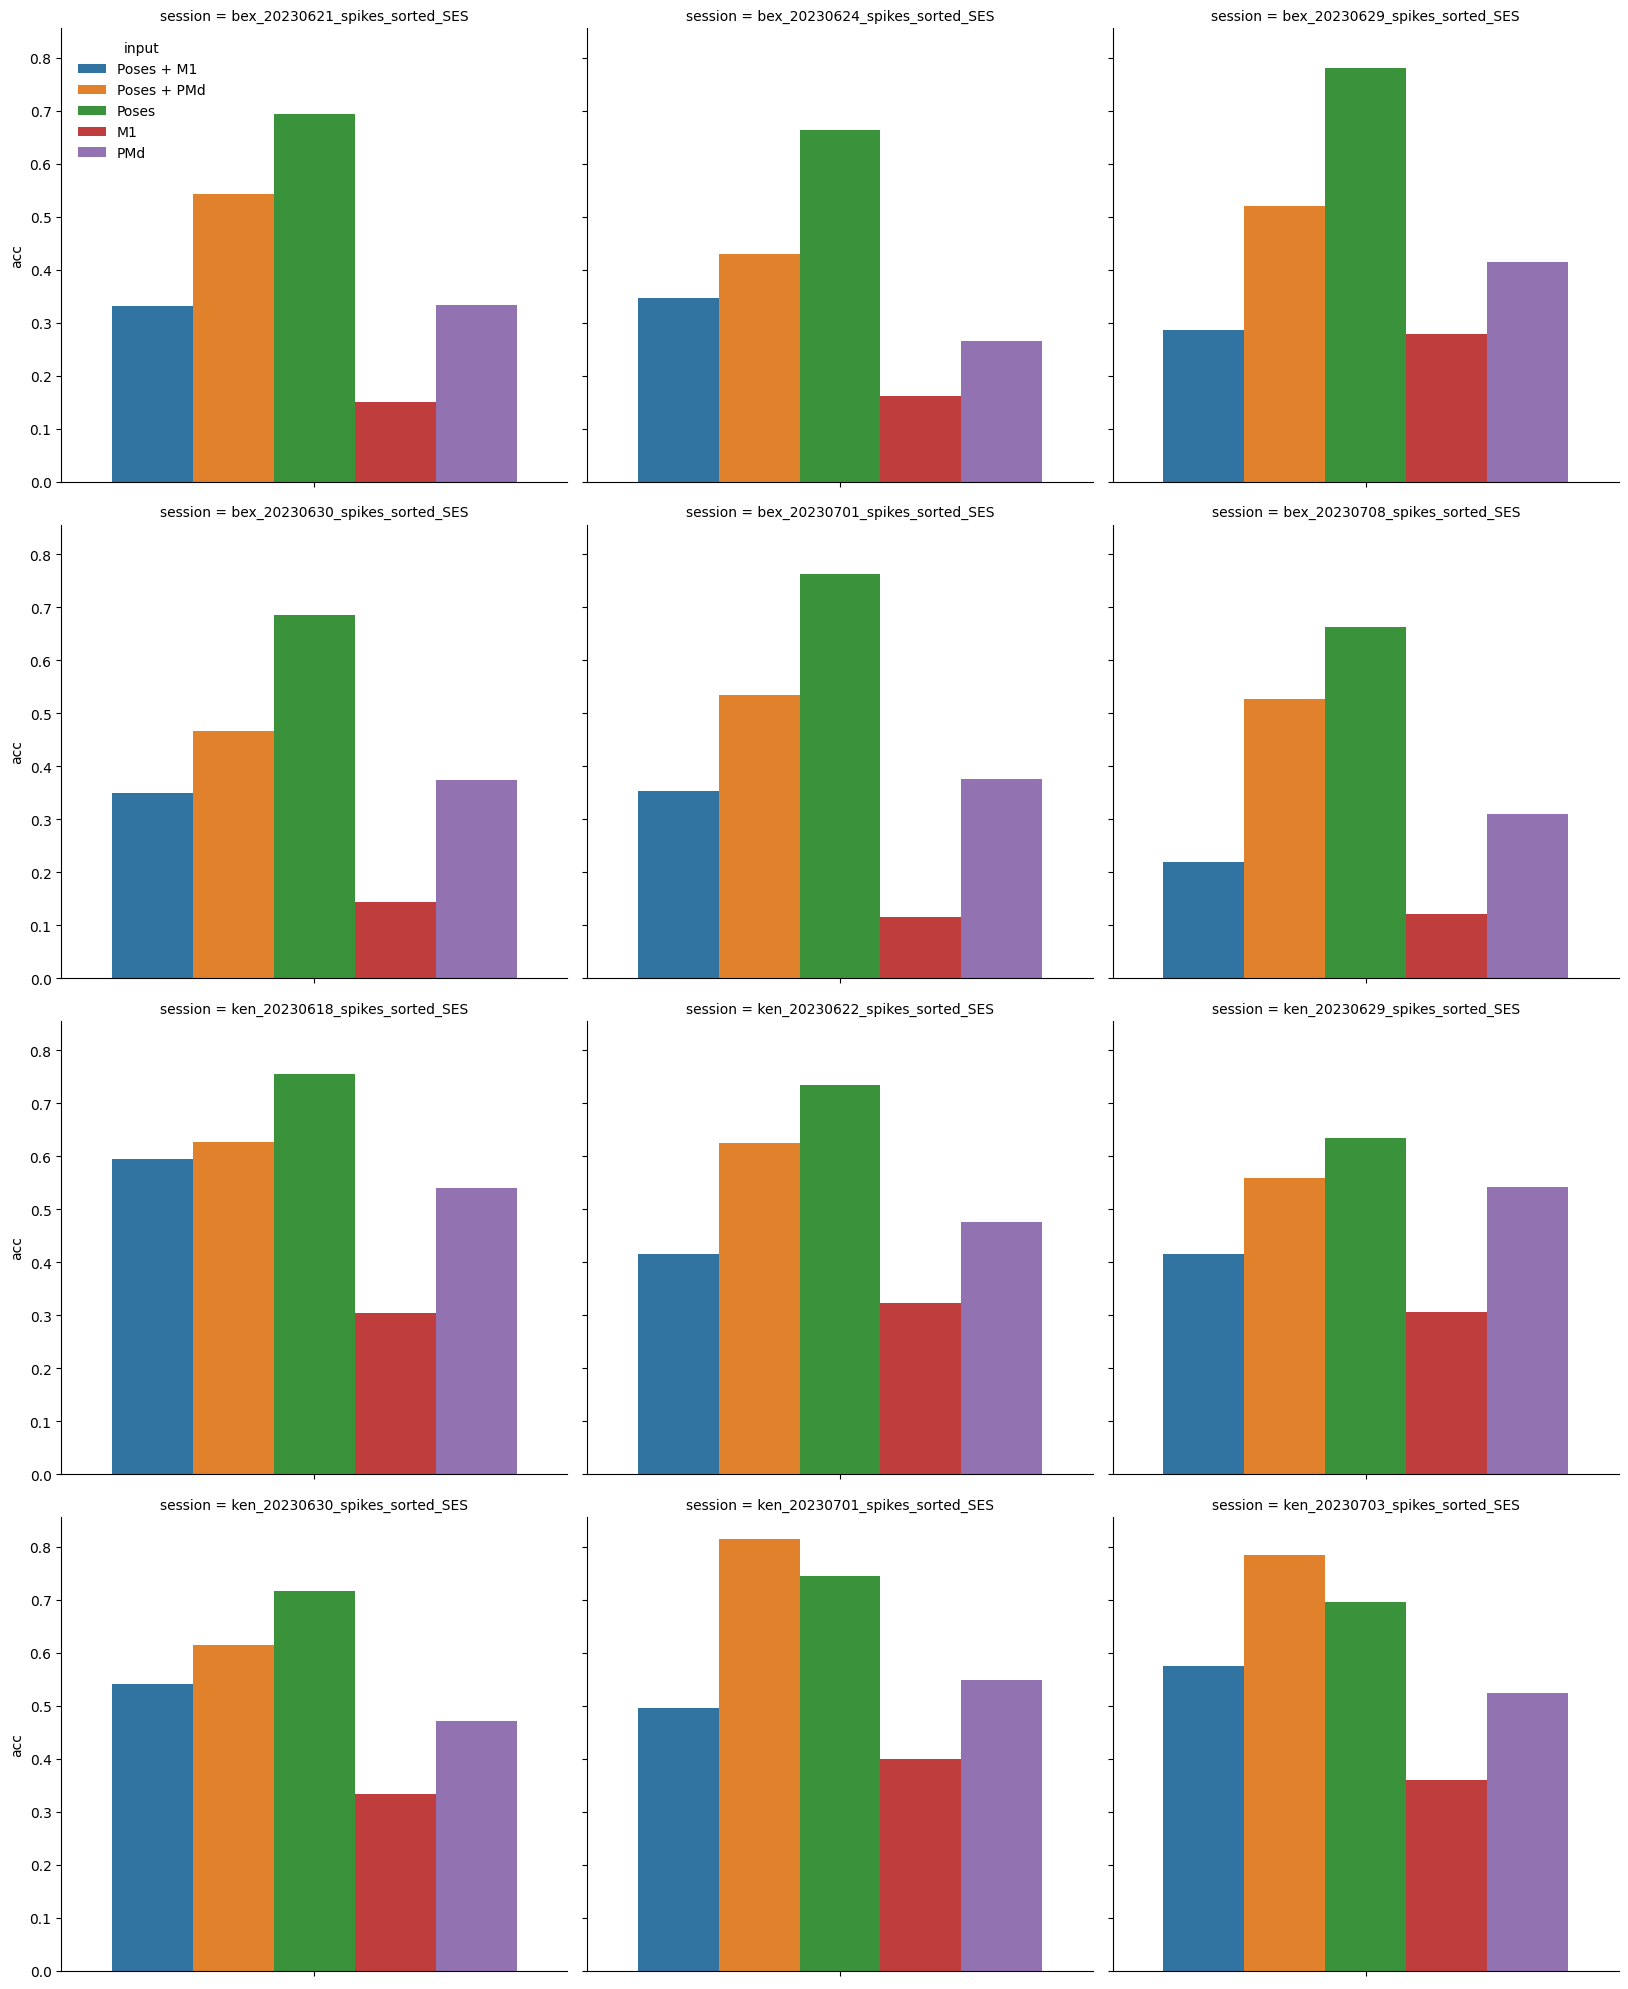

In [8]:
g = sns.catplot(
    data=results,
    hue="input",
    y="acc",
    col="session",
    kind="bar",
    col_wrap=3,
)

g._legend.set_bbox_to_anchor((0.04, 0.98))
g._legend.set_loc("upper left")
plt.tight_layout()